In [19]:
import pandas as pd
import numpy as np
import math

In [4]:
data =  pd.read_csv('water.txt',delimiter= '\t')

In [11]:
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


# Test 1

Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [25]:
mu = data[['mortality']].mean()
sd = data[['mortality']].std(ddof = 1)
n = len(data)

In [26]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [48]:
_tconfint_generic(mu,sd/math.sqrt(n), n-1 ,0.05, 'two-sided')

(mortality    1476.083341
 dtype: float64,
 mortality    1572.211741
 dtype: float64)

На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [28]:
south_data = data[data.location.eq('South')]

In [32]:
south_data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


In [49]:
s_mu = south_data[['mortality']].mean()
s_sd = south_data[['mortality']].std(ddof = 1)
s_n = len(south_data)

In [50]:
_tconfint_generic(s_mu,s_sd/math.sqrt(s_n), s_n-1 ,0.05, 'two-sided')

(mortality    1320.151746
 dtype: float64,
 mortality    1433.463638
 dtype: float64)

На тех же данных постройте 95% доверительный интервал для средней годовой смертности по всем северным городам. Пересекается ли этот интервал с предыдущим? Как вы думаете, какой из этого можно сделать вывод?

In [51]:
north_data = data[data.location.eq('North')]

In [52]:
n_mu = north_data[['mortality']].mean()
n_sd = north_data[['mortality']].std(ddof = 1)
n_n = len(north_data)

In [53]:
_tconfint_generic(n_mu,n_sd/math.sqrt(n_n), n_n-1 ,0.05, 'two-sided')

(mortality    1586.560525
 dtype: float64,
 mortality    1680.639475
 dtype: float64)

Пересекаются ли 95% доверительные интервалы для средней жёсткости воды в северных и южных городах?

In [54]:
ws_mu = south_data[['hardness']].mean()
ws_sd = south_data[['hardness']].std(ddof = 1)

In [55]:
_tconfint_generic(ws_mu,ws_sd/math.sqrt(s_n), s_n-1 ,0.05, 'two-sided')

(hardness    53.467199
 dtype: float64,
 hardness    86.071263
 dtype: float64)

In [56]:
wn_mu = north_data[['hardness']].mean()
wn_sd = north_data[['hardness']].std(ddof = 1)

In [57]:
_tconfint_generic(wn_mu,wn_sd/math.sqrt(n_n), n_n-1 ,0.05, 'two-sided')

(hardness    21.422487
 dtype: float64,
 hardness    39.377513
 dtype: float64)

# Test 2

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [81]:
data = np.zeros(50).reshape(50,1)

In [82]:
import random
i = random.randrange(50) 
i

34

In [83]:
data[i] = 1

In [84]:
from statsmodels.stats.proportion import proportion_confint

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [90]:
from scipy.stats import norm
import matplotlib.pyplot as plt
z = norm.ppf(0.025)
z

-1.9599639845400545

In [92]:
p = 1./50

0.02

In [98]:
a = p-z*(p*(1-p)/50.0)**0.5
a

0.05880530708179099

In [99]:
b = p+z*(p*(1-p)/50.0)**0.5
b

-0.018805307081790987

В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [78]:
wilson_interval = proportion_confint(sum(data), len(data), method = 'wilson')
wilson_interval

(array([0.00353926]), array([0.10495444]))

Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью 
±0.01 на уровне доверия 95%?

In [79]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [80]:
n_samples = int(np.ceil(samplesize_confint_proportion(data.mean(), 0.01)))
n_samples

753

In [ ]:
from statsmodels.stats.proportion import samplesize_confint_proportion
from math import ceil
ceil(samplesize_confint_proportion(1.0/50, 0.01, method='normal'))


Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью 
±0.01 на уровне доверия 95%, от неизвестного параметра 
p. Посмотрите, при каком значении
p нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?
Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком 
p, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью 
±0.01 на уровне доверия 95%?


In [103]:
z

-1.9599639845400545

In [107]:
def calc_c(p):
        return (z*((p*(1-p))**0.5)/0.01)**2

In [120]:
p = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 ]
n = np.zeros(len(p)).reshape(len(p),1)

In [121]:
for i in range (len(p)):
    n[i] = calc_c(p[i])

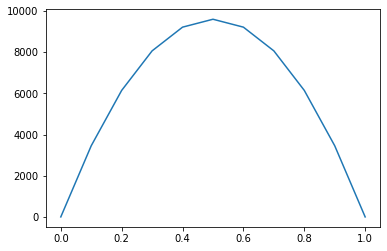

In [122]:
plt.plot(p,n)

In [123]:
n

array([[   0.        ],
       [3457.31293862],
       [6146.33411311],
       [8067.06352346],
       [9219.50116967],
       [9603.64705174],
       [9219.50116967],
       [8067.06352346],
       [6146.33411311],
       [3457.31293862],
       [   0.        ]])

# Final test

В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [173]:
asp = (104./11037)
plac = (189./11034)

In [175]:
print (plac - asp)

0.0077060239760047815


task 6
Постройте теперь 95% доверительный интервал для снижения вероятности инфаркта при приёме аспирина. Чему равна его верхняя граница? Округлите ответ до четырёх знаков после десятичной точки.


In [177]:
asp = np.zeros(11037).reshape(11037,1)
for i in range(104):
    asp[i] = 1
plac = np.zeros(11034).reshape(11034,1)
for i in range(189):
    plac[i] = 1

In [180]:
import scipy
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [183]:
left_boundary, right_boundary = proportions_confint_diff_ind(plac, asp)

In [184]:
print(left_boundary, right_boundary)

0.004687750675049439 0.010724297276960124


task 7

In [185]:
plac_att = 189./(11034-189)
asp_att = 104./(11037-104)

In [189]:
round(plac_att/asp_att,4)

1.8321

In [187]:
asp_att

0.009512485136741973

task 8

In [190]:
asp = np.zeros(11037).reshape(11037,1)
for i in range(104):
    asp[i] = 1

In [191]:
plac = np.zeros(11034).reshape(11034,1)
for i in range(189):
    plac[i] = 1

In [203]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [204]:
np.random.seed(0)
asp_boot = get_bootstrap_samples(asp, 1000)
plac_boot = get_bootstrap_samples(plac, 1000)


In [205]:
def calc(data):
    return sum(data)/(len(data)-sum(data))

In [206]:
res =  np.zeros(1000).reshape(1000,1)

In [207]:
for i in range(1000):
    res[i] = calc(plac_boot[i])/calc(asp_boot[i])

In [208]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [209]:
round(stat_intervals(res, 0.05)[0],4)

1.4442

# Практика проверки гипотез тест

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [2]:
mu = 0.75
n = 100
x = 67

In [14]:
from scipy import stats
round(stats.binom_test(x, n, 3./4),4)

0.0822

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).
Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [18]:
import pandas as pd
import scipy
pines =  pd.read_csv('pines.txt',delimiter= '\t')

In [12]:
pines.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [41]:
len(pines)/25.

23.36

In [19]:
binx = [0.,40.,80.,120.,160.,200.]
biny = [0.,40.,80.,120.,160.,200.]

In [29]:
trees= scipy.stats.binned_statistic_2d(pines['sn'],pines['we'],pines['sn'],statistic  = 'count', bins=[binx,biny]).statistic

In [30]:
trees

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [44]:
stats.chisquare(trees.flatten(),len(pines)/25.,ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)